In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

linkname = 'C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv'
dataset = pd.read_csv(linkname)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [3]:
# View the first 5 rows of cleaned data
dataset.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
dataset.drop(['marital'],axis=1, inplace=True)
dataset1 = dataset.iloc[:, 0:7]

In [5]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)

In [6]:
array = dataset2.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [8]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [10]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [31]:
results_c = []
names_c = []

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Cargar el archivo
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")

# 1. Codificar variables categóricas automáticamente
df_model = pd.get_dummies(df, drop_first=True)

# 2. Separar X e y
X = df_model.drop(columns=["response_binary"])
y = df_model["response_binary"]

# 3. Crear modelo y validación cruzada
model = LogisticRegression(max_iter=1000)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# 4. Evaluar el modelo
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("Resultados por fold:", cv_results)
print("Precisión promedio:", cv_results.mean())

Resultados por fold: [0.99094247 0.9877571  0.99632713 0.99926543 0.9970617  0.99853085
 0.99902057 0.99853085 0.99828599 0.99828599]
Precisión promedio: 0.9964008094399496


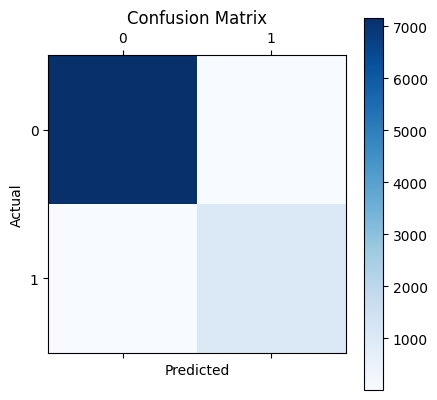

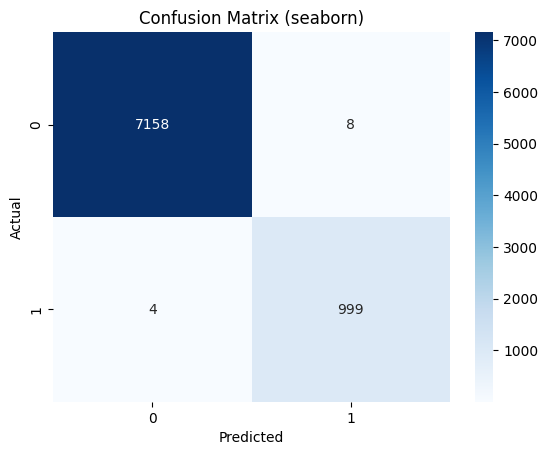

Confusion Matrix:
[[7158    8]
 [   4  999]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Supongamos que ya hiciste la codificación con dummies
df_model = pd.get_dummies(df, drop_first=True)

# 2. Definir X e y
X = df_model.drop(columns=['response_binary'])
y = df_model['response_binary']

# 3. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Predicciones
predictions = model.predict(X_test)

# 6. Matriz de confusión (versión visual mejorada con seaborn)
cm = confusion_matrix(y_test, predictions)

# Opción A: Visualización con matplotlib puro
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Opción B (recomendada): Visualización con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (seaborn)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Mostrar la matriz en texto (opcional)
print("Confusion Matrix:")
print(cm)


In [36]:
dataset4 = dataset2.drop(['response_binary'],axis = 1)
dataset4['duration'] = dataset['duration']

In [37]:
array = dataset4.values
X = array[:,0:20]
Y = array[:,20]

In [38]:
test_size= 0.20
seed = 10
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))